In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
import scipy.stats as stats
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# library written for this exercise providing additional functions for assignment submission, and others
import utils 

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Polynomial Regression

In [3]:
mu = 7.0
sigma = 0.56
n_samples = 500

x = np.random.lognormal(mean=mu, sigma=sigma, size=n_samples)

In [4]:
np.mean(x), np.max(x), np.min(x), np.std(x)

(1204.2613011839642, 5910.11752706796, 206.97428900894076, 728.9533387869953)

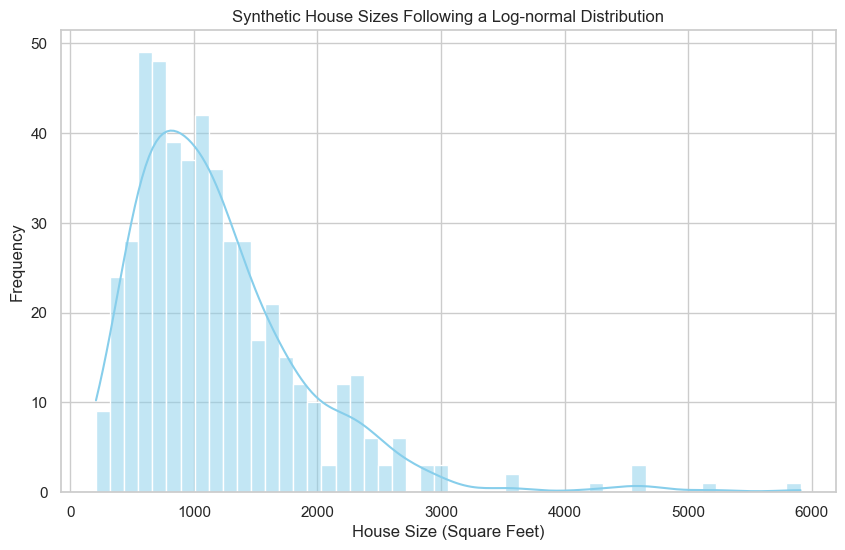

In [5]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram of the house sizes
plt.figure(figsize=(10, 6))
sns.histplot(x, bins=50, kde=True, color='skyblue')

# Add titles and labels
plt.title('Synthetic House Sizes Following a Log-normal Distribution')
plt.xlabel('House Size (Square Feet)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [6]:

def get_scaled_feature(X: np.array):
    m = np.mean(X, axis=0)
    s = np.std(X, axis=0)
    
    return (X - m) / s

x = get_scaled_feature(X=x)

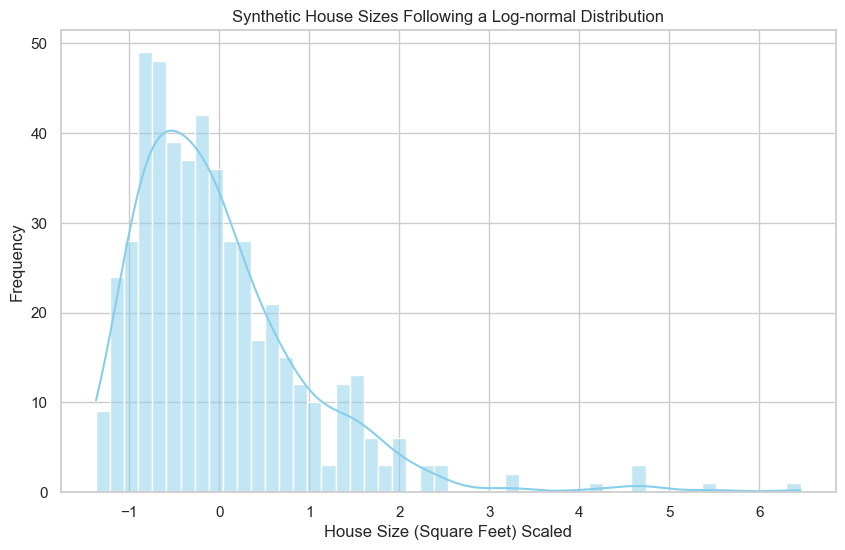

In [7]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram of the house sizes
plt.figure(figsize=(10, 6))
sns.histplot(x, bins=50, kde=True, color='skyblue')

# Add titles and labels
plt.title('Synthetic House Sizes Following a Log-normal Distribution')
plt.xlabel('House Size (Square Feet) Scaled')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [8]:
noise = np.random.normal(2.5, 2.4, size=n_samples)

y = 1.5 - (0.02 * x) + (2.2 * x**2) + noise

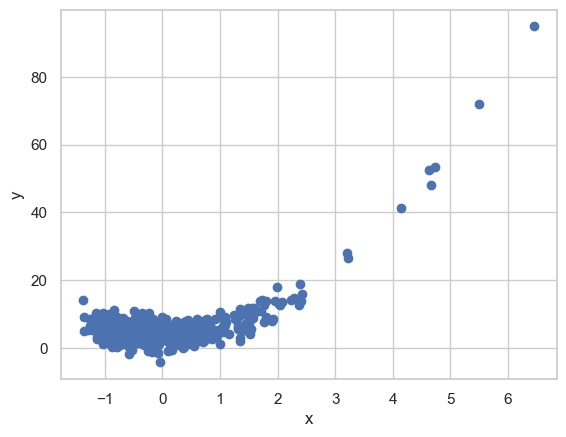

In [9]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
poly = PolynomialFeatures(degree=4)
X = poly.fit_transform(x.reshape(-1, 1))
X.shape

(500, 5)

In [11]:
X

array([[ 1.00000000e+00,  5.73834391e-02,  3.29285909e-03,
         1.88955579e-04,  1.08429210e-05],
       [ 1.00000000e+00, -2.82165382e-01,  7.96173026e-02,
        -2.24652466e-02,  6.33891488e-03],
       [ 1.00000000e+00, -8.96490275e-01,  8.03694812e-01,
        -7.20504583e-01,  6.45925351e-01],
       ...,
       [ 1.00000000e+00,  1.07476888e+00,  1.15512815e+00,
         1.24149580e+00,  1.33432105e+00],
       [ 1.00000000e+00, -9.26014037e-01,  8.57501996e-01,
        -7.94058885e-01,  7.35309674e-01],
       [ 1.00000000e+00, -8.45333881e-01,  7.14589371e-01,
        -6.04066607e-01,  5.10637969e-01]])

In [12]:
y = y.reshape(-1, 1)
y.shape

(500, 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=47)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((375, 5), (125, 5), (375, 1), (125, 1))

In [15]:
theta = stats.uniform.rvs(0, 1, size=(X_train.shape[1], 1))
theta

array([[0.3764078 ],
       [0.80583648],
       [0.61564429],
       [0.4159114 ],
       [0.79694691]])

In [20]:

def cost_fn(theta: np.array, X: np.array, y: np.array, m: int=X_train.shape[0]):
    X = X.T
    y = y.T
    
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    cost = (1./2*m) * np.sum(diff**2)
    
    return cost


def gradient_fn(theta: np.array, X: np.array, y: np.array, m: int=X_train.shape[0]):
    X = X.T
    y = y.T
    
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    gradient = (1./m) * np.dot(diff, X.T)
    
    return gradient.T

In [21]:

def train(X_train, y_train, n_iterations: int=10000, lr: float=0.0001):
    # Initialize theta
    theta = stats.uniform.rvs(-1, 1, size=(X_train.shape[1], 1))
    
    # to plot the cost over the iteration
    costs = []
    
    for i in range(n_iterations):
        cost = cost_fn(theta=theta, X=X_train, y=y_train)
        costs.append(cost)
        
        if (i % 10) == 0:
            print(f"The cost at {i}th iteration is {cost}")
            print(f"Theta: {theta.T}")
            print("************************************************\n")
        
        gradient = gradient_fn(theta=theta, X=X_train, y=y_train)
        
        # update the theta 
        theta = theta - (lr * gradient)
    
    return theta, np.array(costs)

In [23]:
n_iterations = 50000

opt_theta, cost = train(X_train=X_train, y_train=y_train, n_iterations=n_iterations)

The cost at 0th iteration is 331994634.7797662
Theta: [[-0.69079419 -0.75035604 -0.56761367 -0.71133301 -0.85741843]]
************************************************

The cost at 10th iteration is 3971324.192532012
Theta: [[-0.68249965 -0.74000719 -0.51835887 -0.49408267  0.21193668]]
************************************************

The cost at 20th iteration is 3934960.829978897
Theta: [[-0.67623881 -0.73840828 -0.51143744 -0.48679622  0.21882795]]
************************************************

The cost at 30th iteration is 3918375.917688714
Theta: [[-0.67000451 -0.73688546 -0.50486215 -0.48116115  0.21749508]]
************************************************

The cost at 40th iteration is 3901890.369169285
Theta: [[-0.66378117 -0.73537152 -0.49830771 -0.47556376  0.21610423]]
************************************************

The cost at 50th iteration is 3885502.3395724907
Theta: [[-0.65756865 -0.7338659  -0.49177154 -0.46999145  0.21471864]]
************************************

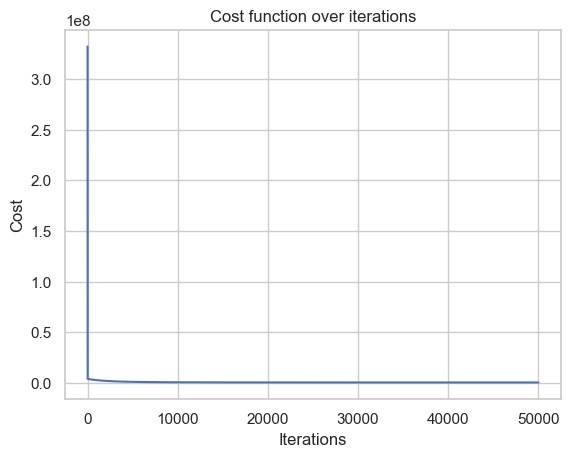

In [24]:
# Plot the cost over iterations
plt.plot(range(n_iterations), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

In [25]:
opt_theta

array([[ 3.89408853],
       [-0.28983454],
       [ 2.09107962],
       [ 0.13205476],
       [-0.01942887]])

In [26]:
y_train_pred = np.dot(opt_theta.T, X_train.T)
y_train_pred.shape, y_train.shape

((1, 375), (375, 1))

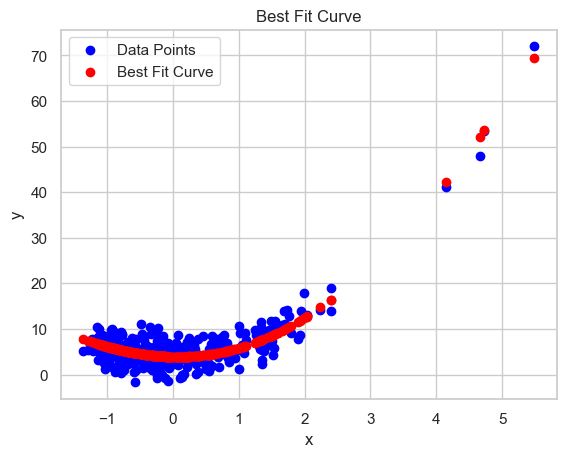

In [27]:
# Plot the original data points
plt.scatter(X_train[:, 1], y_train[:, 0], color='blue', label='Data Points')

# Plot the best fit line
plt.scatter(X_train[:, 1], y_train_pred.T, color='red', label='Best Fit Curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Curve')

# Show the legend
plt.legend()
plt.show()

In [28]:
y_pred = np.dot(opt_theta.T, X_test.T)
y_pred.shape, y_test.shape

((1, 125), (125, 1))

In [29]:
diff = y_pred - y_test.T
sq_error = np.sum(diff**2)
mse = sq_error / y_test.shape[0]
mse

5.949889101213287

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
# using sklearn
mean_squared_error(y_pred=y_pred, y_true=y_test.T)

5.949889101213287

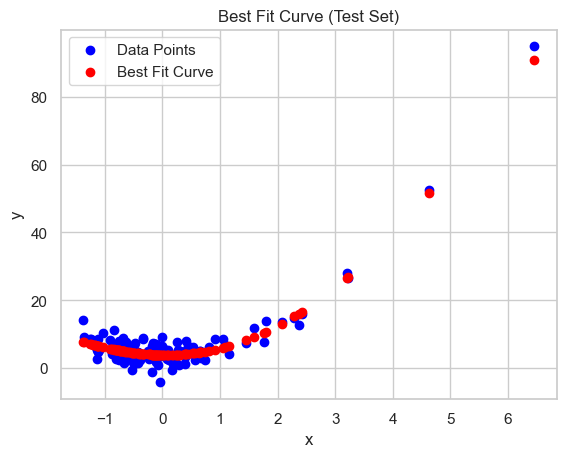

In [32]:
# Plot the original data points
plt.scatter(X_test[:, 1], y_test[:, 0], color='blue', label='Data Points')

# Plot the best fit line
plt.scatter(X_test[:, 1], y_pred.T, color='red', label='Best Fit Curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Curve (Test Set)')

# Show the legend
plt.legend()
plt.show()

In [33]:
# without regularization
opt_theta

array([[ 3.89408853],
       [-0.28983454],
       [ 2.09107962],
       [ 0.13205476],
       [-0.01942887]])

#### Training with Regularization

In [37]:

def regularized_cost_fn(theta: np.array, X: np.array, y: np.array, lambda_: float, m: int=X_train.shape[0]):
    X = X.T
    y = y.T
    
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    # let's calculate the regularization term
    regularized_term = (lambda_/2*m) * np.dot(theta.T, theta)
    
    cost = (1.0/2*m) * np.sum(diff**2) + regularized_term
    
    return cost

In [40]:


def train_with_regularization(X_train, y_train, n_iterations: int=10000, lr: float=0.0001, 
                            lambda_: float=0.1, m: int=X_train.shape[0]):
    
    # Initialize theta
    theta = stats.uniform.rvs(-1, 1, size=(X_train.shape[1], 1))
    
    # to plot the cost over the iteration
    costs = []
    
    for i in range(n_iterations):
        cost = regularized_cost_fn(theta=theta, X=X_train, y=y_train, lambda_=lambda_)
        costs.append(cost)
        
        if (i % 10) == 0:
            print(f"The cost at {i}th iteration is {cost}")
            print(f"Theta: {theta.T}")
            print("************************************************\n")
        
        gradient = gradient_fn(theta=theta, X=X_train, y=y_train)
        
        # calculate the fraction
        frac = lr * (lambda_/m)
        
        # update the theta 
        theta = theta * (1 - frac) - (lr * gradient)
    
    return theta, np.array(costs)

In [41]:
n_iterations = 50000

theta_regularized, cost_regularized = train_with_regularization(X_train=X_train, 
                                                                y_train=y_train, 
                                                                n_iterations=n_iterations,
                                                                lambda_=0.1,
                                                                lr=0.00001
                                                                )

The cost at 0th iteration is [[81422488.12244679]]
Theta: [[-0.08223073 -0.19908587 -0.32240928 -0.40249657 -0.35987569]]
************************************************

The cost at 10th iteration is [[38779808.86096057]]
Theta: [[-0.08135162 -0.19758145 -0.31502864 -0.36822545 -0.18870425]]
************************************************

The cost at 20th iteration is [[19331300.10495122]]
Theta: [[-0.08057848 -0.19653463 -0.30986293 -0.34494278 -0.07314279]]
************************************************

The cost at 30th iteration is [[10460866.8710822]]
Theta: [[-0.07987693 -0.19579686 -0.30619307 -0.32908097  0.00486379]]
************************************************

The cost at 40th iteration is [[6414735.7683762]]
Theta: [[-0.07922376 -0.19526781 -0.30353345 -0.31823073  0.05750856]]
************************************************

The cost at 50th iteration is [[4568805.73544762]]
Theta: [[-0.07860329 -0.19487974 -0.30155611 -0.310765    0.09302584]]
*****************

In [42]:
y_train_pred_reg = np.dot(theta_regularized.T, X_train.T)
y_train_pred_reg.shape, y_train.shape

((1, 375), (375, 1))

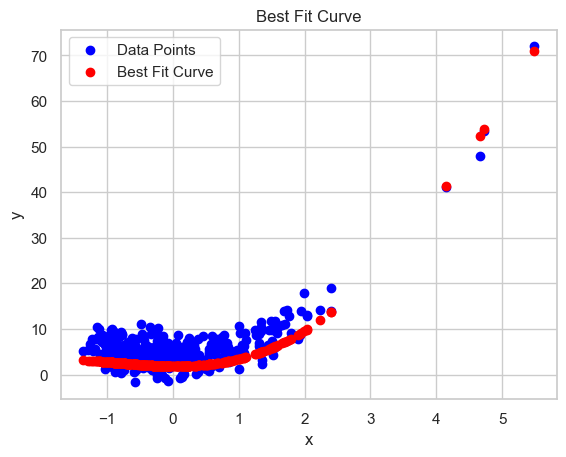

In [43]:
# Plot the original data points
plt.scatter(X_train[:, 1], y_train[:, 0], color='blue', label='Data Points')

# Plot the best fit line
plt.scatter(X_train[:, 1], y_train_pred_reg.T, color='red', label='Best Fit Curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Curve')

# Show the legend
plt.legend()
plt.show()

##### Using Sklearn

In [44]:
model = LinearRegression()

# Fit the model
model.fit(X_train[:, 1:], y_train)

# Model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: [4.12244888]
Coefficient: [ 0.00369785  1.86779315  0.10525737 -0.00809083]


In [45]:
from sklearn.linear_model import SGDRegressor

In [46]:
model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.0001)

# Fit the model
model.fit(X_train[:, 1:], y_train)

# Model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: [-1.8064501e+09]
Coefficient: [-2.69605098e+09 -5.57802584e+09 -6.45152701e+09  6.70779055e+09]
